#Sentimental Analysis NLP

In [ ]:
!pip install nltk

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import re #Regular expressions
import nltk
import matplotlib.pyplot as plt

import seaborn as sns

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

### Load Dataset from Local Directory

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


### Importing Dataset

In [ ]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

###Segregating Dataset into Input & Output

In [ ]:
features = dataset.iloc[:, 10].values
labels = dataset.iloc[:, 1].values
print(labels)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


#Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its structure and distribution.

Dataset contains 14640 rows and 15 columns.

Missing values in each column:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


<ipython-input-6-f282a82471af>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=dataset, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

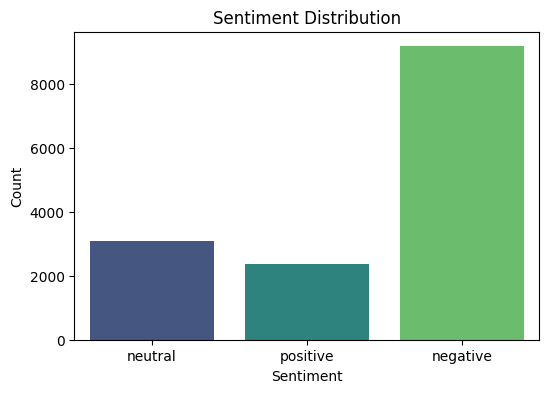

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


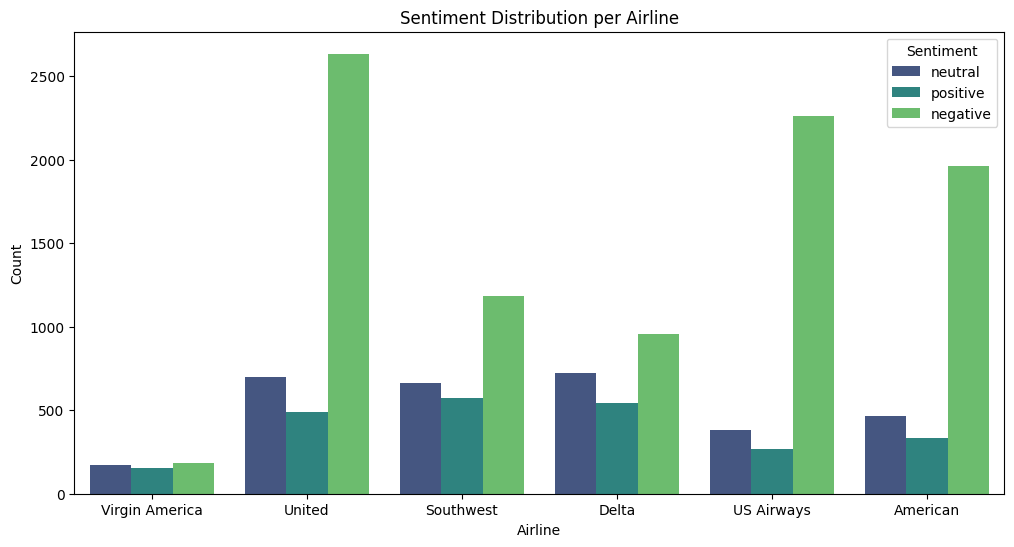

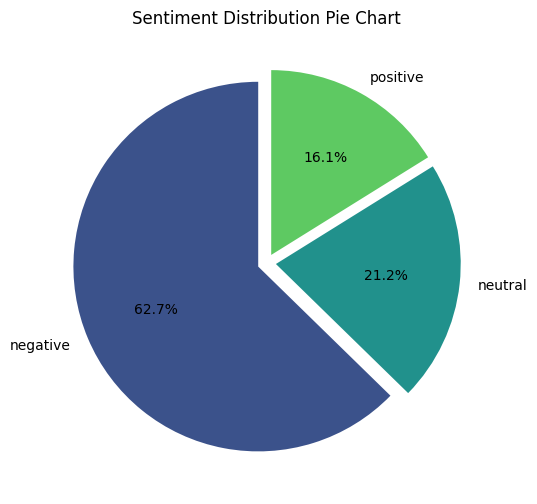

In [ ]:

print(f"Dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} columns.")


print("\nMissing values in each column:")
print(dataset.isnull().sum())


plt.figure(figsize=(6,4))
sns.countplot(x='airline_sentiment', data=dataset, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(x='airline', hue='airline_sentiment', data=dataset, palette='viridis')
plt.title('Sentiment Distribution per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


plt.figure(figsize=(6,6))
dataset['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', 3), startangle=90, explode=[0.05]*3)
plt.title('Sentiment Distribution Pie Chart')
plt.ylabel('')
plt.show()

###Removing the Special Character

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

###Feature Extraction from text


In [ ]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


###Splitting Dataset into Train & Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

###Loading Random Forest Algorithm

In [ ]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

###Predicting the Test data with Trained Model

In [ ]:
predictions = text_classifier.predict(X_test)

###Score of the Model

In [ ]:
print(accuracy_score(y_test, predictions))

0.7599043715846995


###Confusion Matrix

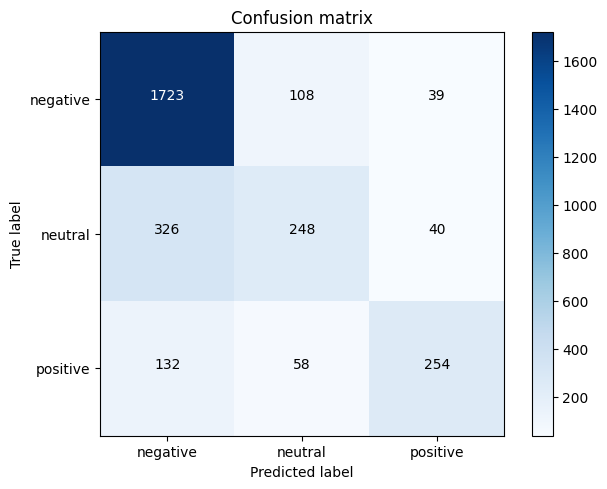

In [ ]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, predictions, labels=['negative', 'neutral', 'positive'])
plot_confusion_matrix(cm, classes=['negative', 'neutral', 'positive'])

In [ ]:
# Calculating loss (misclassification rate)
total = sum(sum(cm))
misclassified = total - np.trace(cm)  # sum of non-diagonal elements
loss = misclassified / total

print("Loss (Misclassification Rate):", loss)

Loss (Misclassification Rate): 0.24009562841530055


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions, labels=['negative', 'neutral', 'positive'])

def calculate_metrics(cm):

    metrics_per_class = {}
    for i, label in enumerate(['negative', 'neutral', 'positive']):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
        Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        Prevalence = (TP + FN) / cm.sum()


        metrics_per_class[label] = {
            'True Positive Rate (Recall/Sensitivity)': TPR,
            'False Positive Rate': FPR,
            'True Negative Rate (Specificity)': TNR,
            'Precision': Precision,
            'Prevalence': Prevalence
        }

    return metrics_per_class


metrics_per_class = calculate_metrics(cm)


for label, metrics in metrics_per_class.items():
    print(f"Metrics for {label}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")


Metrics for negative:
True Positive Rate (Recall/Sensitivity): 0.9214
False Positive Rate: 0.4329
True Negative Rate (Specificity): 0.5671
Precision: 0.7900
Prevalence: 0.6387


Metrics for neutral:
True Positive Rate (Recall/Sensitivity): 0.4039
False Positive Rate: 0.0717
True Negative Rate (Specificity): 0.9283
Precision: 0.5990
Prevalence: 0.2097


Metrics for positive:
True Positive Rate (Recall/Sensitivity): 0.5721
False Positive Rate: 0.0318
True Negative Rate (Specificity): 0.9682
Precision: 0.7628
Prevalence: 0.1516


